## **Programming Assignment 3**
**LOGISTIC REGRESSION**

---


In [6]:
!pip install ucimlrepo > /dev/null
from ucimlrepo import fetch_ucirepo

# Fetch the breast cancer dataset
breast_cancer = fetch_ucirepo(id=17)

# Use only the mean values for each feature
x = breast_cancer.data.features
x = x.filter(regex='1$')
y = breast_cancer.data.targets

#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

*This script downloads the breast cancer dataset from the UCI repository, extracts the mean values for each feature, and assigns the target labels to the variable y. It imports essential libraries to support various operations: pandas and numpy are utilized for data manipulation and processing, while seaborn and matplotlib facilitate data visualization. Additionally, scikit-learn is employed for machine learning tasks, including logistic regression, data scaling, model evaluation, and plotting. These libraries collectively enable efficient data handling, model development, and performance assessment.*

In [7]:
print(str(breast_cancer.metadata.additional_info.variable_info))

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


In [8]:
#Display the first few rows of the features:
x.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
#Display the first few rows of the target:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


Convert the target labels from 'M' (Malignant) and 'B' (Benign) to binary format:










In [10]:
# Ensure that we are working with a copy of the DataFrame to avoid SettingWithCopyWarning
y_copy = y.copy()

# Replacing the labels from M and B to 1 and 0, respectively
y_copy['Diagnosis'] = y_copy['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0).astype(int)

# Display the first few rows to check the changes
y_copy.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


**Generate and visualize the correlation matrix:**



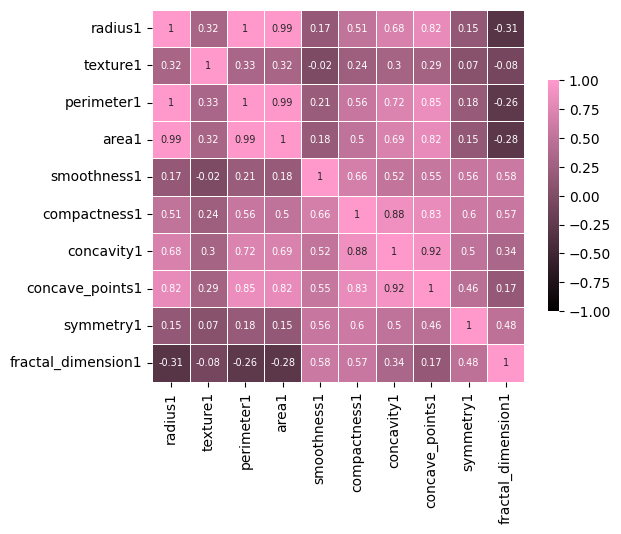

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

def heatmap(x):
    # 1. Calculate correlation matrix
    correlation_matrix = x.corr().round(2)

    # 2. Create a figure and axes for the heatmap
    plt.figure(figsize=(6, 6))

    # 3. Define a custom black and pink colormap
    colors = [(0, 0, 0), (1, 0.6, 0.8)]  # Black to pink
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("black_pink_cmap", colors)

    # 4. Create the heatmap
    sns.heatmap(
        correlation_matrix,          # Data to visualize
        cmap=custom_cmap,            # Use our custom colormap
        vmin=-1, vmax=1, center=0,  # Set color scale range
        square=True, linewidths=.5,  # Make cells square and add lines
        cbar_kws={"shrink": .5},     # Shrink the colorbar
        annot=True, annot_kws={"fontsize": 7}  # Add annotations with font size 7
    )

    # 5. Show the heatmap
    plt.show()

# Call the function to create the heatmap
heatmap(x)

*This code generates a heatmap that visualizes the relationships between various features in the breast cancer dataset. The color intensity and corresponding labels represent the strength and direction of the correlations, facilitating the identification of features with significant interdependencies.*

**Eliminate features to prevent multicollinearity:**








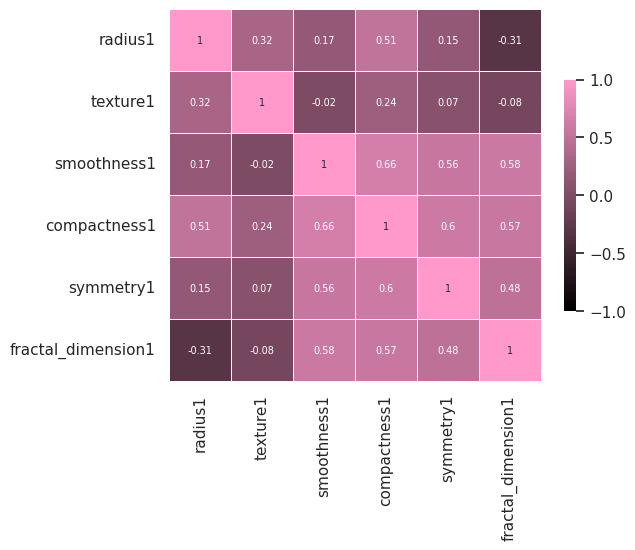

In [19]:
x = x[['radius1', 'texture1', 'smoothness1', 'compactness1', 'symmetry1', 'fractal_dimension1']]
heatmap(x)

**Part 3: Model Training**

---
*Divide the data into training and testing sets:*









In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=7)

*Create a logistic regression pipeline:*

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with StandardScaler and LogisticRegression
model = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

# Fit the pipeline to the training set (flatten y_train using ravel())
model.fit(x_train, y_train.values.ravel())

# Use the model to predict the values for the test set
y_pred = model.predict(x_test)

*Evaluate the model:*

In [15]:
import pandas as pd
data = []
for key, coef in zip(x.keys(), model.named_steps['model'].coef_[0]):
    data.append([key, round(coef, 2)])  # Append feature and coefficient to data list

# Create pandas DataFrame
results_df = pd.DataFrame(data, columns=['Feature', 'Coefficient'])

# Add accuracy rows to the DataFrame
accuracy_data = [
    ['Training Accuracy', round(model.score(x_train, y_train), 2)],
    ['Testing Accuracy', round(model.score(x_test, y_test), 2)]
]
accuracy_df = pd.DataFrame(accuracy_data, columns=['Feature', 'Coefficient'])

# Concatenate the DataFrames
final_df = pd.concat([accuracy_df, results_df], ignore_index=True)

# Style the table with pink background and hide index
styled_final_df = final_df.style.set_properties(**{'background-color': 'pink'}).hide(axis="index")

# Display the styled DataFrame
display(styled_final_df)

Feature,Coefficient
Training Accuracy,0.950000
Testing Accuracy,0.930000
radius1,1.050000
texture1,1.260000
perimeter1,1.020000
area1,1.140000
smoothness1,0.890000
compactness1,-0.350000
concavity1,1.140000
concave_points1,1.620000


*Visualize the confusion matrix:*

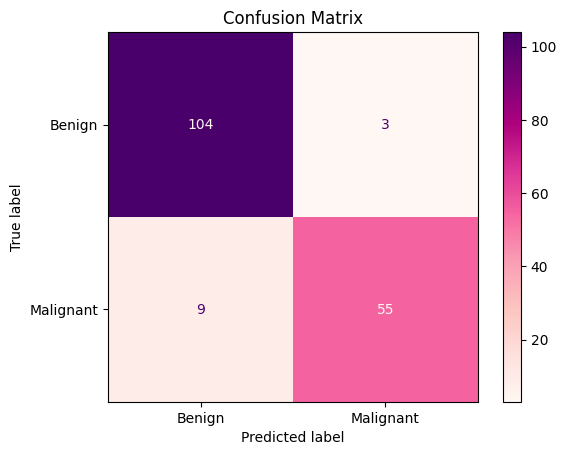

In [16]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=["Benign", "Malignant"])
cm_display.plot(cmap='RdPu')
plt.title('Confusion Matrix')
plt.show()

*Calculate the evaluation metrics:*

In [17]:
TN, FP, FN, TP = cfm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
far = FP / (FP + TN)
f1 = 2 * (precision * recall) / (precision + recall)

import pandas as pd
# Store metrics in a dictionary
metrics_data = {
    "Metric": ["Precision", "Recall", "False Alarm Rate", "F1-score"],
    "Value": [precision, recall, far, f1]
}

# Create a Pandas DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame as a table without the index
print(metrics_df.to_markdown(index=False))

| Metric           |     Value |
|:-----------------|----------:|
| Precision        | 0.948276  |
| Recall           | 0.859375  |
| False Alarm Rate | 0.0280374 |
| F1-score         | 0.901639  |


*Plot the ROC curve:*

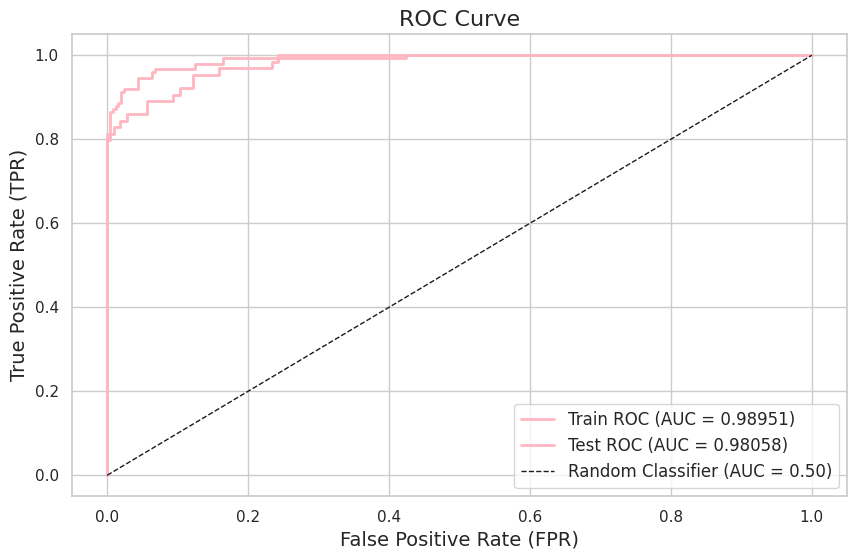

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that we are working with a copy of the DataFrame to avoid SettingWithCopyWarning
y_copy = y.copy()

# Replacing the labels from M and B to 1 and 0, respectively
y_copy['Diagnosis'] = y_copy['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0).astype(int)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_copy['Diagnosis'], stratify=y_copy['Diagnosis'], test_size=0.3, random_state=7)

# Create a pipeline with StandardScaler and LogisticRegression
model = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

# Fit the pipeline to the training set (flatten y_train using ravel())
model.fit(x_train, y_train)

# Use the model to predict the probabilities for the train and test set
y_train_probs = model.predict_proba(x_train)[:, 1]
y_test_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for training
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
auc_train = roc_auc_score(y_train, y_train_probs)

# Compute ROC curve and AUC for testing
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
auc_test = roc_auc_score(y_test, y_test_probs)

# Set the style for the plot
sns.set(style="whitegrid")

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.5f})", color='lightpink', linewidth=2)
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.5f})", color='lightpink', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)", linewidth=1)

# Add labels and legend
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# **Guide Questions**

**1. What steps are required to remove the "Sample code number" column?**

*We can utilize the drop method in pandas to remove the 'Sample code number' column. This step is essential for eliminating irrelevant or unnecessary features from the dataset, ensuring the model can concentrate on the most pertinent attributes for predicting the target variable.*



---

**2. How can the "Class" values be converted into binary (0 and 1) form in Python?**


*The "Class" values in the dataset can be transformed into binary format (0 and 1) using Python's map function. This conversion is essential for preparing categorical data in a format suitable for binary classification, allowing the model to accurately interpret and learn from the target variable. Specifically, benign and malignant classes are represented by the values 2 and 4, respectively. To perform the conversion, the "Diagnosis" column should be updated using the formula: Diagnosis = Diagnosis / 2 - 1.*

---

**3. What is the importance of splitting the dataset into training and testing sets?**

*Splitting the dataset into training and testing subsets is a fundamental step in assessing a model's performance on unseen data. This practice is critical for evaluating the model's generalization capabilities and ensuring that its predictive accuracy is not limited to the data it was trained on, but extends reliably to new and previously unseen scenarios.*











---

**4. Why is it necessary to use the stratify parameter in the train_test_split function?**

*Utilizing the stratify parameter in the train_test_split function is crucial for maintaining the original class distribution across both the training and testing datasets. This helps ensure that the model is trained on a representative sample, thereby enhancing its ability to make accurate predictions for each class.*


---


**5. What is logistic regression, and why is it suitable for this dataset?**

*Logistic Regression and Its Appropriateness for the Dataset: Logistic regression is a statistical technique commonly employed for binary classification tasks. Given that the target variable ('Class') in this dataset is binary, logistic regression is well-suited for predicting the probability of a tumor being either malignant or benign based on the provided features.*





---
**6. How can the training and testing accuracy of the logistic regression model be calculated?**

*Evaluating the Training and Testing Accuracy of the Logistic Regression Model: The accuracy of the logistic regression model for both the training and testing datasets can be assessed using the accuracy_score function from scikit-learn. This metric serves as an indicator of the model's performance, reflecting its ability to correctly predict the target variable across both datasets.*





---
**7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**:

*The key influential features include radius, texture, smoothness, compactness, symmetry, and fractal dimension. The coefficients associated with these features emphasize their importance. Features with higher absolute coefficients have a greater impact on determining tumor status, underscoring their significance in predicting the likelihood of malignancy.*






---

**8. How is a confusion matrix generated, and what does it represent?**

*The confusion matrix can be generated using the confusion_matrix function from sklearn.metrics. It provides a comprehensive summary of the actual versus predicted values, highlighting the true positives, true negatives, false positives, and false negatives. This matrix offers valuable insights into the model's performance.*



---

**9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

*These metrics can be derived from the confusion matrix using specific formulas, offering insights into the model's performance in terms of precision, recall, overall accuracy, and the rate of false positives or misclassifications. The formulas are as follows:*

*   Precision: TP / (TP + FP)
*   Recall: TP / (TP + FN)
*   False Alarm Rate: FP / (FP + TN)
*   F1-score: 2 * (precision * recall) / (precision + recall)




---
**10. Why are these metrics important for evaluating the performance of a classifier?**

*These metrics are critical for assessing a classifier's performance and can be prioritized based on the specific application. They provide a comprehensive insight into the model's predictive capabilities, including its precision, recall, and overall accuracy. These metrics are essential for evaluating the model's effectiveness and identifying areas for potential enhancement.*





---

**11. What is an ROC curve, and how is it plotted for a logistic regression model?**

*The ROC curve is generated by comparing the true positive rate (TPR) with the false positive rate (FPR), providing a comprehensive view of a model's performance across various thresholds. This curve visually represents the relationship between TPR and FPR, offering valuable insights into the model's ability to differentiate between classes. The curve can be plotted using the roc_curve function from scikit-learn, helping evaluate the model’s overall classification effectiveness.*




---
**12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**

*Calculation and Significance of AUC: The Area Under the Receiver Operating Characteristic (ROC) Curve (AUC) quantifies a model's ability to distinguish between different classes. Higher AUC values signify superior model performance, indicating a greater proficiency in making accurate predictions.*






---
**13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**

*The training ROC curve is generally superior to the testing ROC curve. A significant disparity between the two may indicate issues of underfitting or overfitting. Such discrepancies can provide valuable insights into the model's capacity to generalize and its performance on unseen data.*






---

**14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**

*One of the primary challenges encountered was the preprocessing of the data, arising from discrepancies between the provided dataset and the accompanying documentation. By thoroughly analyzing and addressing the differences in features, this issue was effectively resolved. Other potential challenges include handling missing data, normalizing features, and addressing class imbalances. These can be mitigated through the application of appropriate preprocessing techniques and model adjustments, ultimately improving the model's robustness and predictive performance.*




---
**15. If the model's performance is not satisfactory, what adjustments could be made to improve it?**

*To enhance the model's performance, potential adjustments may involve fine-tuning hyperparameters, selecting pertinent features, addressing class imbalances, or employing advanced modeling techniques. These modifications are critical for optimizing the model, improving accuracy, and bolstering its capacity for making dependable predictions.*

